In [26]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import re
import string
%matplotlib inline

In [27]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Change to lower case
    3. Remove numbers
    4. Remove white space
    5. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Convert upper to lower case
    nopunc = nopunc.lower()
    
    # Remove numbers
    nopunc = re.sub(r'\d+', '', nopunc)
    
    # Remove white spaces
    return nopunc.strip()

In [28]:
df = pd.read_csv('lang_data.csv')

In [29]:
df0 = df[int(-0.1*len(df)):]
len(df0)
df0.to_csv('lang_data_holdout_unprocessed.csv', index=False)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839 entries, 0 to 2838
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      2761 non-null   object
 1   language  2839 non-null   object
dtypes: object(2)
memory usage: 44.5+ KB


In [31]:
df.describe()

,text,language
count,2761,2839
unique,2752,3
top,It's not rocket science,English
freq,2,2077


In [32]:
df.groupby('language').describe()

text                                             
           count unique                              top freq
language                                                     
Afrikaans    639    638  So maklik soos brood en botter.    2
English     2055   2047  A rolling stone gathers no moss    2
Nederlands    67     67          Oude liefde roest niet.    1

In [33]:
df.isnull().sum()

text        78
language     0
dtype: int64

In [34]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

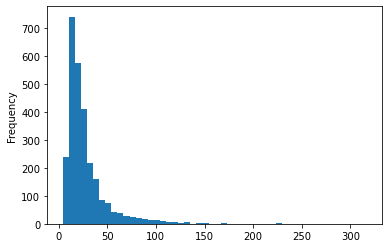

In [35]:
df['text'] = df['text'].astype(str)
df['length'] = df['text'].apply(len)
df['length'].plot(bins=50, kind='hist');

In [36]:
df.length.describe()

count    2752.000000
mean       27.860828
std        24.596280
min         4.000000
25%        14.000000
50%        20.000000
75%        32.000000
max       317.000000
Name: length, dtype: float64

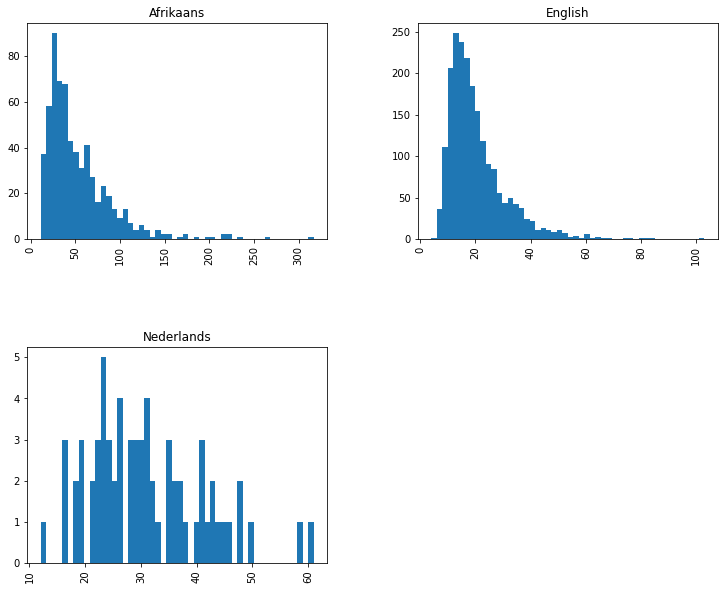

In [37]:
df.hist(column='length', by='language', bins=50, figsize=(12,10));

In [38]:
df.drop(['length'], axis=1, inplace=True)
df['text'] = df['text'].astype(str)
df['text'] = df['text'].apply(text_process)

In [39]:
df['text'].describe()

count                                   2752
unique                                  2733
top       the pen is mightier than the sword
freq                                       3
Name: text, dtype: object

In [40]:
duplicates = df[df.duplicated()]
print(duplicates)

                                                   text   language
561                           by the skin of your teeth    English
1264                             gert erf is gert swerf  Afrikaans
1311                           beware the ides of march    English
1569                          take with a grain of salt    English
1620                  neer cast a clout till may be out    English
1703              geld wat sleg is maak krom wat reg is  Afrikaans
1895                             on a wing and a prayer    English
1919              an eye for an eye a tooth for a tooth    English
2052                              cant hold a candle to    English
2069                                      in a pigs eye    English
2124                 the pen is mightier than the sword    English
2162                                hasta la vista baby    English
2352                                 the skys the limit    English
2438  om te dink is maklik om te doen is moeilik om ...  Afrik

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df['text'].describe()

count              2733
unique             2733
top       primrose path
freq                  1
Name: text, dtype: object

In [43]:
df.groupby('language').describe()

text                                                      
           count unique                                       top freq
language                                                              
Afrikaans    635    635           daar is te veel dak op die huis    1
English     2031   2031                             primrose path    1
Nederlands    67     67  ieder vogeltje zingt zoals het gebekt is    1

In [44]:
df.head()

,text,language
0,ship shape and bristol fashion,English
1,know the ropes,English
2,graveyard shift,English
3,milk of human kindness,English
4,touch with a bargepole wouldnt,English


In [45]:
df.tail()

,text,language
2834,daar’s ‘n geurtjie aan,Afrikaans
2835,mens evil manners live in brass their virtues ...,English
2836,gofaster,English
2837,red tape,English
2838,in a pickle,English


In [46]:
# Shuffle to eliminate possible segreggation
# Random state to keep hold-out test set consistent
df = shuffle(df, random_state=0)

In [47]:
# 10% test set never to be touched till handin
df1 = df[:int(-0.1*len(df))]
len(df1)

2460

In [48]:
df2 = df[int(-0.1*len(df)):]
len(df2)

273

In [49]:
df1.to_csv('lang_data_processed.csv', index=False)

In [50]:
df2.to_csv('lang_data_holdout_processed.csv', index=False)